<a href="https://colab.research.google.com/github/nurmayadi/learn-machine-learning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Classification

Fitra Nurmayadi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

#Data Preparation

Get Dataset MNIST from Keras Library

In [2]:
mnist = tf.keras.datasets.mnist 

Split Dataset to Train and Test set

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Check example of data

In [4]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

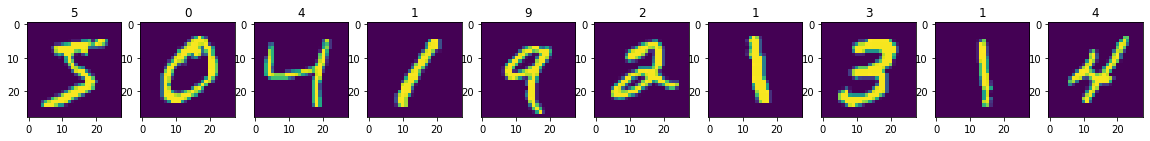

In [5]:
fig, ax = plt.subplots(nrows= 1, ncols=10, figsize=(20,2))
for i in range(0,10):
  ax[i].imshow(X_train[i])
  ax[i].set_title(Y_train[i])

#Data Normalization

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

#Create Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


#Train Model

In [11]:
hist = model.fit(
    X_train,
    Y_train,
    epochs=10,
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5007 - accuracy: 0.8529
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2762 - accuracy: 0.9208
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9303
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2289 - accuracy: 0.9349
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2177 - accuracy: 0.9370
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2090 - accuracy: 0.9395
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2020 - accuracy: 0.9418
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1977 - accuracy: 0.9426
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1923 - accuracy: 0.9441
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.18

#Plot Accuracy

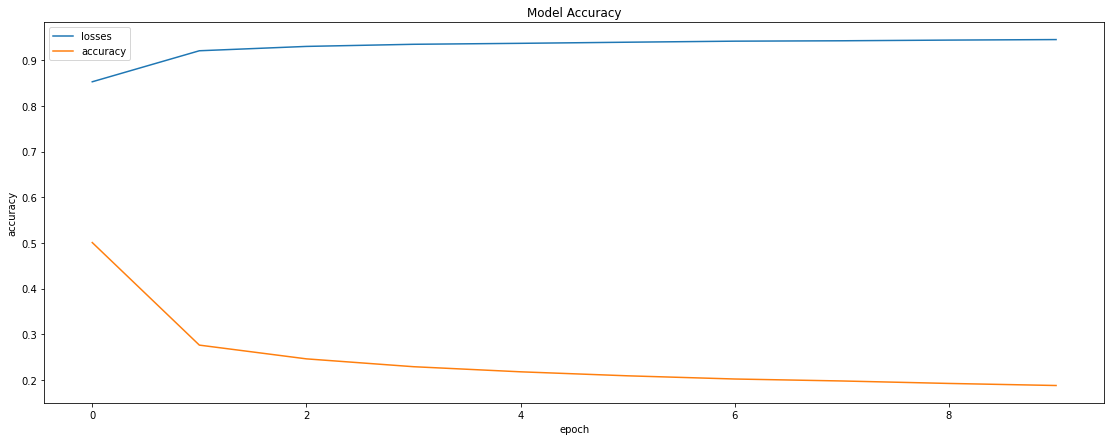

In [12]:
plt.figure(figsize=(19,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['losses', 'accuracy'], loc='best')
plt.show()

In [13]:
loss_acc = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss_acc[0],loss_acc[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2100 - accuracy: 0.9387
Test set
  Loss: 0.210
  Accuracy: 0.939


#Model Predict

In [14]:
prediction = model.predict(X_test)
prediction

313/313 [==============================] - 1s 1ms/step


array([[1.02589205e-04, 7.93470605e-08, 1.30988727e-03, ...,
        9.97941554e-01, 1.41401524e-05, 1.50017062e-04],
       [4.36080683e-07, 7.15534261e-05, 9.99909103e-01, ...,
        1.27227187e-10, 2.42925040e-07, 1.84506714e-14],
       [1.90267692e-05, 9.94906604e-01, 1.82969065e-03, ...,
        6.32761221e-04, 1.50678586e-03, 1.84457138e-04],
       ...,
       [1.86584401e-08, 8.58227622e-08, 2.77458998e-08, ...,
        6.44109241e-05, 1.02969550e-03, 5.07451547e-03],
       [3.40753803e-09, 2.52771230e-07, 6.52149386e-15, ...,
        1.67012758e-11, 1.41730170e-05, 1.35017675e-09],
       [1.16383408e-05, 6.98756331e-10, 3.29813936e-08, ...,
        3.77884691e-16, 1.46579850e-07, 1.25837180e-13]], dtype=float32)

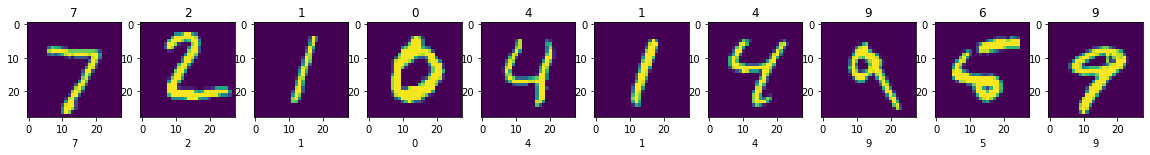

In [15]:
fig, ax = plt.subplots(nrows= 1, ncols=10, figsize=(20,2))
for i in range(0,10):
  ax[i].imshow(X_test[i])
  ax[i].set_title(np.argmax(prediction[i]))
  ax[i].set_xlabel(Y_test[i])

#Save Model

In [16]:
model.save('mnist_model.hdf5')